In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-survey/employee_survey.csv


# Data Collection
Here we are reading the data from a csv file and making it into a pandas Dataframe. 

In [2]:
import pandas as pd
emp_df = pd.read_csv('/kaggle/input/employee-survey/employee_survey.csv')
emp_df

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2070,Male,47,Married,Lead,16,Marketing,Part-Time,1,3,...,6.8,Public Transport,15,8,28,8,Master,False,58.0,1
3021,2072,Female,47,Married,Lead,8,IT,Contract,3,1,...,6.9,Car,28,8,21,8,Master,True,54.0,1
3022,2145,Male,41,Married,Lead,17,IT,Full-Time,1,1,...,6.1,Public Transport,9,6,23,3,Master,True,58.5,1
3023,2168,Female,54,Married,Lead,16,IT,Full-Time,1,5,...,7.7,Public Transport,18,10,30,7,Master,True,58.0,1


# Data Cleaning 
Checking if there is any null value in our data.

In [3]:
emp_df.isnull().sum()

EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64

# Data Visualization
Here we are analyzing the given data using various graphs.
First we are analyzing what is the job satisfaction of people based on the number of years of experience and their maritial status

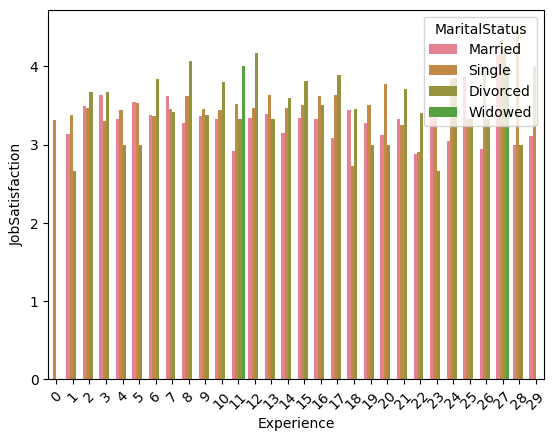

In [4]:
import seaborn as sns
plt.xticks(rotation=45)
cmap = sns.color_palette("husl", 9)
g = sns.barplot(
    data=emp_df,
    x="Experience", y="JobSatisfaction",
    hue="MaritalStatus", errorbar=None,
    palette=cmap,
)


Here we are analyzing the commute distance with respect to the age of the person

/tmp/ipykernel_17/790535044.py:8: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.relplot(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python

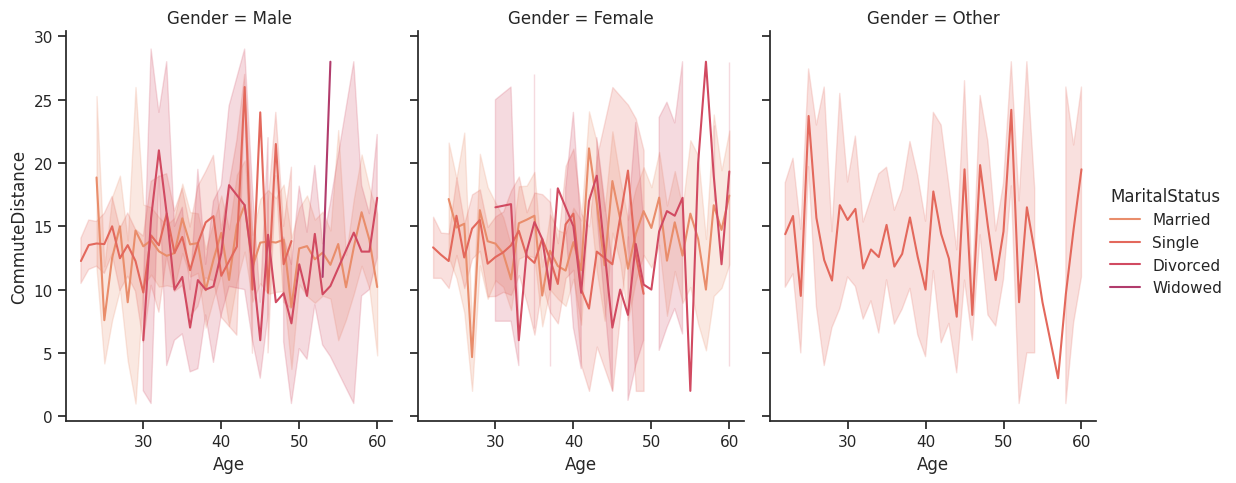

In [5]:
sns.set_theme(style="ticks")


# Define the palette as a list to specify exact values
palette = sns.color_palette("flare")

# Plot the lines on two facets
sns.relplot(
    data=emp_df,
    x="Age", y="CommuteDistance",
    hue="MaritalStatus", col="Gender",
    kind="line", palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

Here we are analyzing the Team Size with respect to years of experience based on Education Level and Job Level of the person

/tmp/ipykernel_17/224448191.py:4: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  g = sns.relplot(


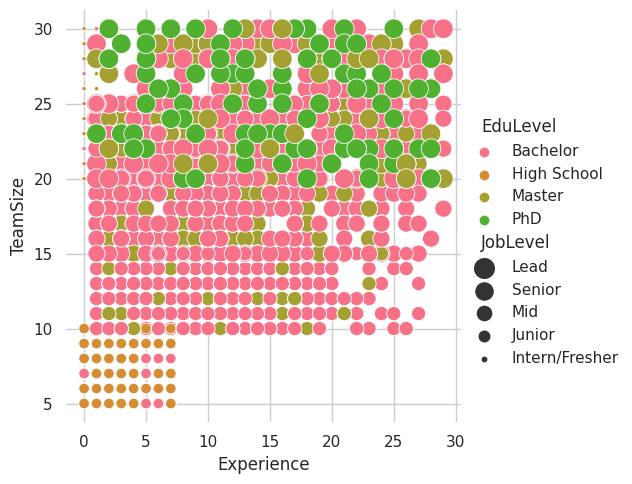

In [6]:
sns.set_theme(style="whitegrid")

cmap = sns.color_palette("husl", 9)
g = sns.relplot(
    data=emp_df,
    x="Experience", y="TeamSize",
    hue="EduLevel", size="JobLevel",
    palette=cmap, sizes=(10, 200), size_order = ["Lead","Senior","Mid","Junior","Intern/Fresher"]
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

Here we are analyzing the Job satisfaction using Physical Activity Hours and Work Load

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='Workload', ylabel='PhysicalActivityHours'>

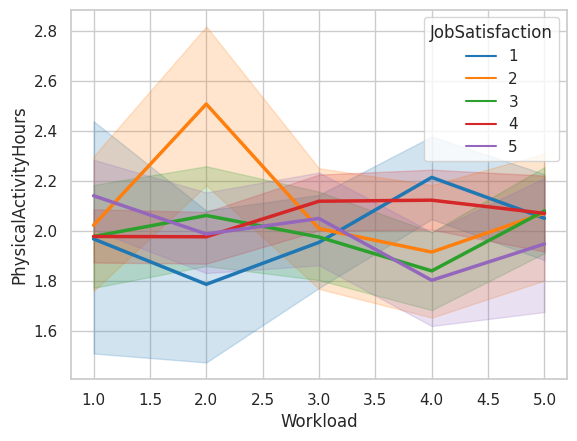

In [7]:
sns.set_theme(style="whitegrid")

sns.lineplot(data=emp_df,x="Workload",y="PhysicalActivityHours",hue="JobSatisfaction", palette="tab10", linewidth=2.5)

# Prediction
Here we are trying to predict the Job Satisfaction of a person based on all the given data using Decision Tree Algorithm.
First we are making a copy of the emp_df Dataframe to perform the operations on it.

In [8]:
emp1_df=emp_df.copy()

* Here we first convert all the categorical columns into numerical data using one hot encoding.
* Then flatten all the labels using two for loops(we did not use functions like ravel/reshape beacause they work only when all arrays have same dimensions but our labels have different dimension arrays).
* We then create a data frame by joining the labels and values we got from one hot encoding.
* At last we join the data frame we made to emp1_df

In [9]:
ohe = OneHotEncoder()
feature_array=ohe.fit_transform(emp1_df[["Gender","MaritalStatus","JobLevel","Dept","EmpType","CommuteMode","EduLevel","haveOT"]]).toarray()
feature_labels=ohe.categories_
myfeature_labels = []
for i in feature_labels:
    for j in i:
        myfeature_labels.append(j)
myfeature_labels=np.asarray(myfeature_labels,dtype = 'object')
features=pd.DataFrame(feature_array, columns = myfeature_labels)
emp1_df=pd.concat([emp1_df,features],axis=1)
emp1_df

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,Car,Motorbike,Public Transport,Walk,Bachelor,High School,Master,PhD,False,True
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2070,Male,47,Married,Lead,16,Marketing,Part-Time,1,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3021,2072,Female,47,Married,Lead,8,IT,Contract,3,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3022,2145,Male,41,Married,Lead,17,IT,Full-Time,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3023,2168,Female,54,Married,Lead,16,IT,Full-Time,1,5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [10]:
print(myfeature_labels)

['Female' 'Male' 'Other' 'Divorced' 'Married' 'Single' 'Widowed'
 'Intern/Fresher' 'Junior' 'Lead' 'Mid' 'Senior' 'Customer Service'
 'Finance' 'HR' 'IT' 'Legal' 'Marketing' 'Operations' 'Sales' 'Contract'
 'Full-Time' 'Part-Time' 'Bike' 'Car' 'Motorbike' 'Public Transport'
 'Walk' 'Bachelor' 'High School' 'Master' 'PhD' False True]


Here we drop all categorical columns and also EmpID as it will not be useful in our prediction process.

In [11]:
emp1_df=emp1_df.drop(['EmpID','Gender','MaritalStatus','JobLevel','Dept','EmpType','CommuteMode','EduLevel','haveOT'], axis=1)

In [12]:
emp1_df.isnull().sum()

Age                      0
Experience               0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
TrainingHoursPerYear     0
JobSatisfaction          0
Female                   0
Male                     0
Other                    0
Divorced                 0
Married                  0
Single                   0
Widowed                  0
Intern/Fresher           0
Junior                   0
Lead                     0
Mid                      0
Senior                   0
Customer Service         0
Finance                  0
HR                       0
IT                       0
Legal                    0
Marketing                0
Operations               0
Sales                    0
Contract                 0
Full-Time                0
Part-Time                0
B

Here we separate out X and Y values. Y is the target column that is Job Satisfaction. Rest all our X. We then train our decision tree.

In [13]:
X= emp1_df.loc[:,emp1_df.columns != 'JobSatisfaction'].values
Y =emp1_df.loc[:, 'JobSatisfaction'].values
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state= 100)
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100, max_depth=40, max_leaf_nodes=25)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40, max_leaf_nodes=25,
                       random_state=100)

We then print the accuracy and the prediction output we get from the algorithm

In [14]:
y_pred_en=clf_entropy.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  50.110132158590304


In [15]:
print(y_pred_en)

[4 4 1 1 4 4 4 4 4 4 4 4 4 4 1 4 5 5 4 4 4 4 4 1 1 4 5 4 4 1 1 1 1 4 4 1 4
 1 5 4 4 4 4 5 1 1 4 4 4 4 4 4 4 4 5 5 4 4 4 3 4 1 4 4 1 4 1 4 4 4 4 4 4 3
 4 1 4 1 4 1 4 1 4 4 1 4 5 4 4 5 3 4 4 3 4 5 4 5 4 4 4 4 4 4 4 5 5 1 4 1 4
 3 3 3 4 5 4 4 4 4 4 1 5 4 5 3 1 4 4 4 4 4 4 4 1 4 4 4 4 4 1 4 1 1 4 5 4 4
 4 4 4 4 1 4 5 4 4 4 4 5 5 1 1 4 4 4 3 4 4 1 5 3 4 4 5 4 4 4 4 5 1 4 4 4 4
 4 4 5 4 4 4 5 5 4 4 1 4 4 4 4 1 1 4 4 4 4 5 4 5 3 5 4 4 4 4 4 5 5 5 1 5 4
 4 1 1 3 1 1 1 1 4 4 1 4 4 4 5 5 4 1 4 3 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5
 4 4 1 4 4 4 4 4 4 5 4 4 4 1 4 4 1 4 1 5 4 5 4 4 3 4 1 4 1 1 1 4 5 4 4 1 4
 1 4 4 1 4 4 4 1 4 1 4 4 4 4 1 1 1 1 4 5 5 3 3 4 1 1 5 1 1 4 1 1 4 4 4 4 3
 1 5 4 4 4 1 1 4 4 5 4 4 4 3 1 1 1 4 5 5 1 4 4 4 4 4 4 4 1 4 4 4 4 4 4 1 4
 4 1 5 3 4 4 1 4 5 4 1 4 4 4 1 4 3 4 4 1 4 4 4 4 4 4 1 4 3 4 4 4 1 4 3 4 4
 1 4 1 5 1 4 4 4 1 4 4 1 1 4 4 1 4 4 1 3 4 4 4 5 4 4 3 4 4 4 1 4 4 1 4 5 4
 5 5 4 4 4 4 4 4 4 4 4 1 4 1 4 4 1 1 4 5 4 5 1 4 4 1 4 4 4 4 4 4 4 1 4 4 1
 4 3 4 4 3 1 5 3 4 4 4 4 